# ACHR - MASTER

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import scipy
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import hypnogram as hp
import kd_analysis.main.utils as kd
import kd_analysis.main.plots as kp
import kd_analysis.main.hypno as kh
import kd_analysis.paxilline.pax_fin as kpx
import neurodsp.plts.utils as dspu

import sleep_score_for_me.v4 as ss4
import sleep_score_for_me.v1 as ss1
import sleep_score_for_me.v2 as ss2
import kd_analysis.ACHR.achr_utils as au
import kd_analysis.ACHR.achr_plots as ap

bp_def = dict(delta=(0.5, 4), theta=(4, 8), sigma = (11, 16), beta = (13, 20), low_gamma = (40, 55), high_gamma = (65, 80), omega=(300, 700))

In [3]:
def asses_chans(spg, mspg):
    omega = kd.get_bandpower(mspg, (300, 700))
    delta = kd.get_bandpower(spg, (0.5, 4))
    
    chans = spg.channel.values
    
    fig, axes = plt.subplots(nrows=len(chans)+1, ncols=1, sharex=True, figsize=(35,10))
    ap.simple_bp_lineplot(omega, axes[0], ss=8)
    axes[0].set_title('EMG Omega BP')
    
    for chan in chans:
        d = delta.sel(channel=chan)
        ax = axes[chan]
        ap.simple_bp_lineplot(d, ax)
        ax.set_title('Delta BP Channel-' + str(chan))

In [ ]:
def achr_sd_comp():
    """
    compares the sleep rebound across a laser and control experiment.
    
    """

In [19]:
def achr_reb_as_pob(x, bp_def, sd_length=5):
    """
    returns a full bandpower set (according to bp_def) as a percent of that experiment's baseline
    """

In [13]:
"""ACHR_2 SUBJECT INFORMATION"""
a2_info = {}
a2_info['subject'] = 'ACHR_2'
a2_info['complete_key_list'] = ['control1', 'laser1', 'control1-bl', 'laser1-bl']
a2_info['hypnos'] = ['control1', 'laser1']

In [14]:
"""ACHR_3 SUBJECT INFORMATION"""
a3_info = {}
a3_info['subject'] = 'ACHR_3'
a3_info['complete_key_list'] = ['control1', 'laser1', 'sleep1', 'control1-bl', 'laser1-bl', 'sleep1-bl']
a3_info['hypnos'] = ['control1', 'laser1']

a3_starts = {}
a3_starts['control1'] = 

In [ ]:
a2de, a2se = au.load_complete_dataset_from_blocks(a2_info, 'EEGr', [1,2,3], time=4, spg=True) 

a3de, a3se = au.load_complete_dataset_from_blocks(a3_info, 'EEGr', [1,2], time=4, cut=5, spg=True) 

In [ ]:
a2df, a2sf = au.load_complete_dataset_from_blocks(a2_info, 'LFP_', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], time=4, spg=True) 

a3df, a3sf = au.load_complete_dataset_from_blocks(a3_info, 'LFP_', [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], time=4, cut=5, spg=True) 

In [ ]:
a2dm, a2sm = au.load_complete_dataset_from_blocks(a2_info, 'EMG_', [1,2], time=4, spg=True) 

a3dm, a3sm = au.load_complete_dataset_from_blocks(a3_info, 'EMGr', [1,2], time=4, cut=5, spg=True)

In [221]:
au.save_dataset(a2de, 'a2de')
au.save_dataset(a3de, 'a3de')
au.save_dataset(a2df, 'a2df')
au.save_dataset(a3df, 'a3df')

In [223]:
au.save_dataset(a2dm, 'a2dm')
au.save_dataset(a3dm, 'a3dm')

In [8]:
a2de, a2se = au.load_saved_dataset(a2_info, 'a2de', spg=True)

In [9]:
a2df, a2sf = au.load_saved_dataset(a2_info, 'a2df', spg=True)
a2dm = au.load_saved_dataset(a2_info, 'a2dm')

In [10]:
a3de, a3se = au.load_saved_dataset(a3_info, 'a3de', spg=True)
a3df, a3sf = au.load_saved_dataset(a3_info, 'a3df', spg=True)
a3dm = au.load_saved_dataset(a3_info, 'a3dm')

In [ ]:
h5 = pd.to_timedelta(

# Get Hypnos

Will use channel-2 for BOTH ACHR_2 and ACHR_3 SD experiments

In [ ]:
#first load all hypnos which were actually scored
a2h = au.load_hypnograms(a2_info)

In [ ]:
#first load all hypnos which were actually scored
a3h = au.load_hypnograms(a3_info, subtract_sd=5)

In [ ]:
a2h['control1-bl'] = ss4.ssfm_v4(a2de['control1-bl'], a2dm['control1-bl'], chan=2, window_length=10, overlap=1)

In [ ]:
a2h['control1-ssfm'], fo = ss4.ssfm_v4(a2de['control1'], a2dm['control1'], chan=2, window_length=10, overlap=1, user_hyp=a2h['control1'])
fo

In [ ]:
a2h['laser1-bl'] = ss4.ssfm_v4(a2de['laser1-bl'], a2dm['laser1-bl'], chan=2, window_length=10, overlap=1)

In [ ]:
a2h['laser1-ssfm'], fo = ss4.ssfm_v4(a2de['laser1'], a2dm['laser1'], chan=2, window_length=10, overlap=1, user_hyp=a2h['laser1'])
fo

In [ ]:
a3h['control1-bl'] = ss4.ssfm_v4(a3de['control1-bl'], a3dm['control1-bl'], chan=2, window_length=10, overlap=1)

In [ ]:
a3h['control1-ssfm'] = ss4.ssfm_v4(a3de['control1'], a3dm['control1'], chan=2, window_length=10, overlap=1)

In [ ]:
a3h['laser1-bl'] = ss4.ssfm_v4(a3de['laser1-bl'], a3dm['laser1-bl'], chan=2, window_length=10, overlap=1)

In [ ]:
a3h['laser1-ssfm'] = ss4.ssfm_v4(a3de['laser1'], a3dm['laser1'], chan=2, window_length=10, overlap=1)

## Assessment

In [209]:
def test_metric(t, hyp):
    f, ax = plt.subplots(figsize=(35, 10))
    dt = t.datetime.values
    t = ss4.get_norm_feature(t)
    ax = sns.lineplot(x=dt, y=t, ax=ax)
    kp.shade_hypno_for_me(hyp, ax=ax)
    return ax

# Delta Bandpower over course of rebound, as % of Baseline

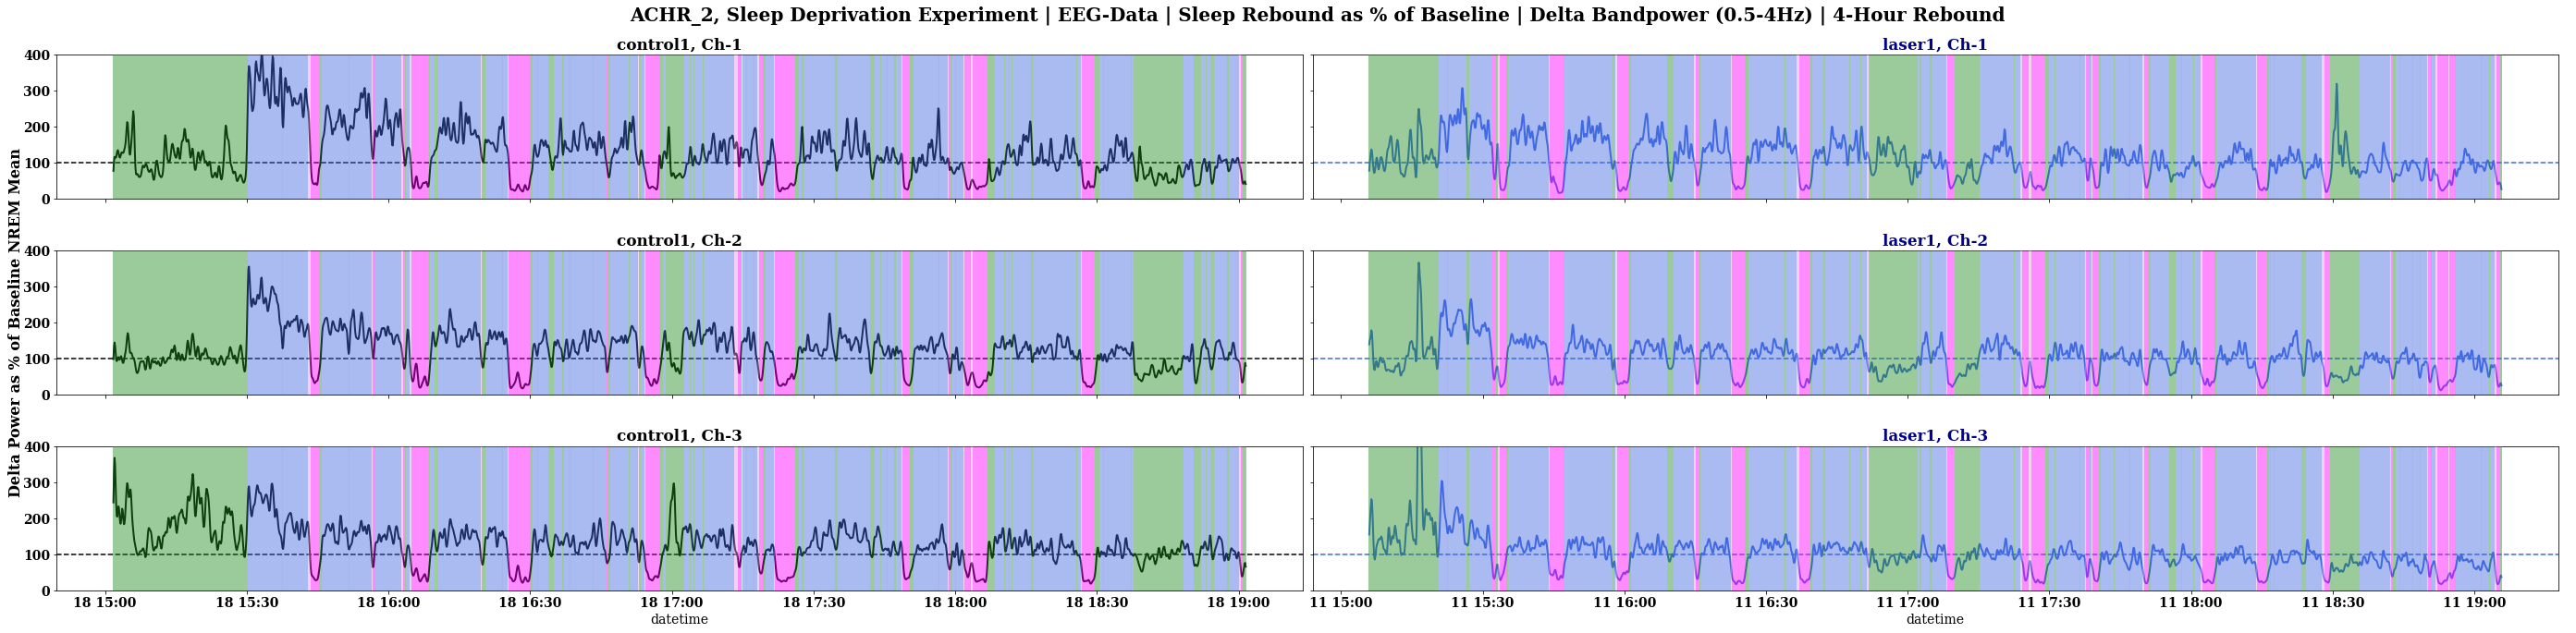

In [64]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.bp_plot_set(x, a2se, a2h, ylim=400)

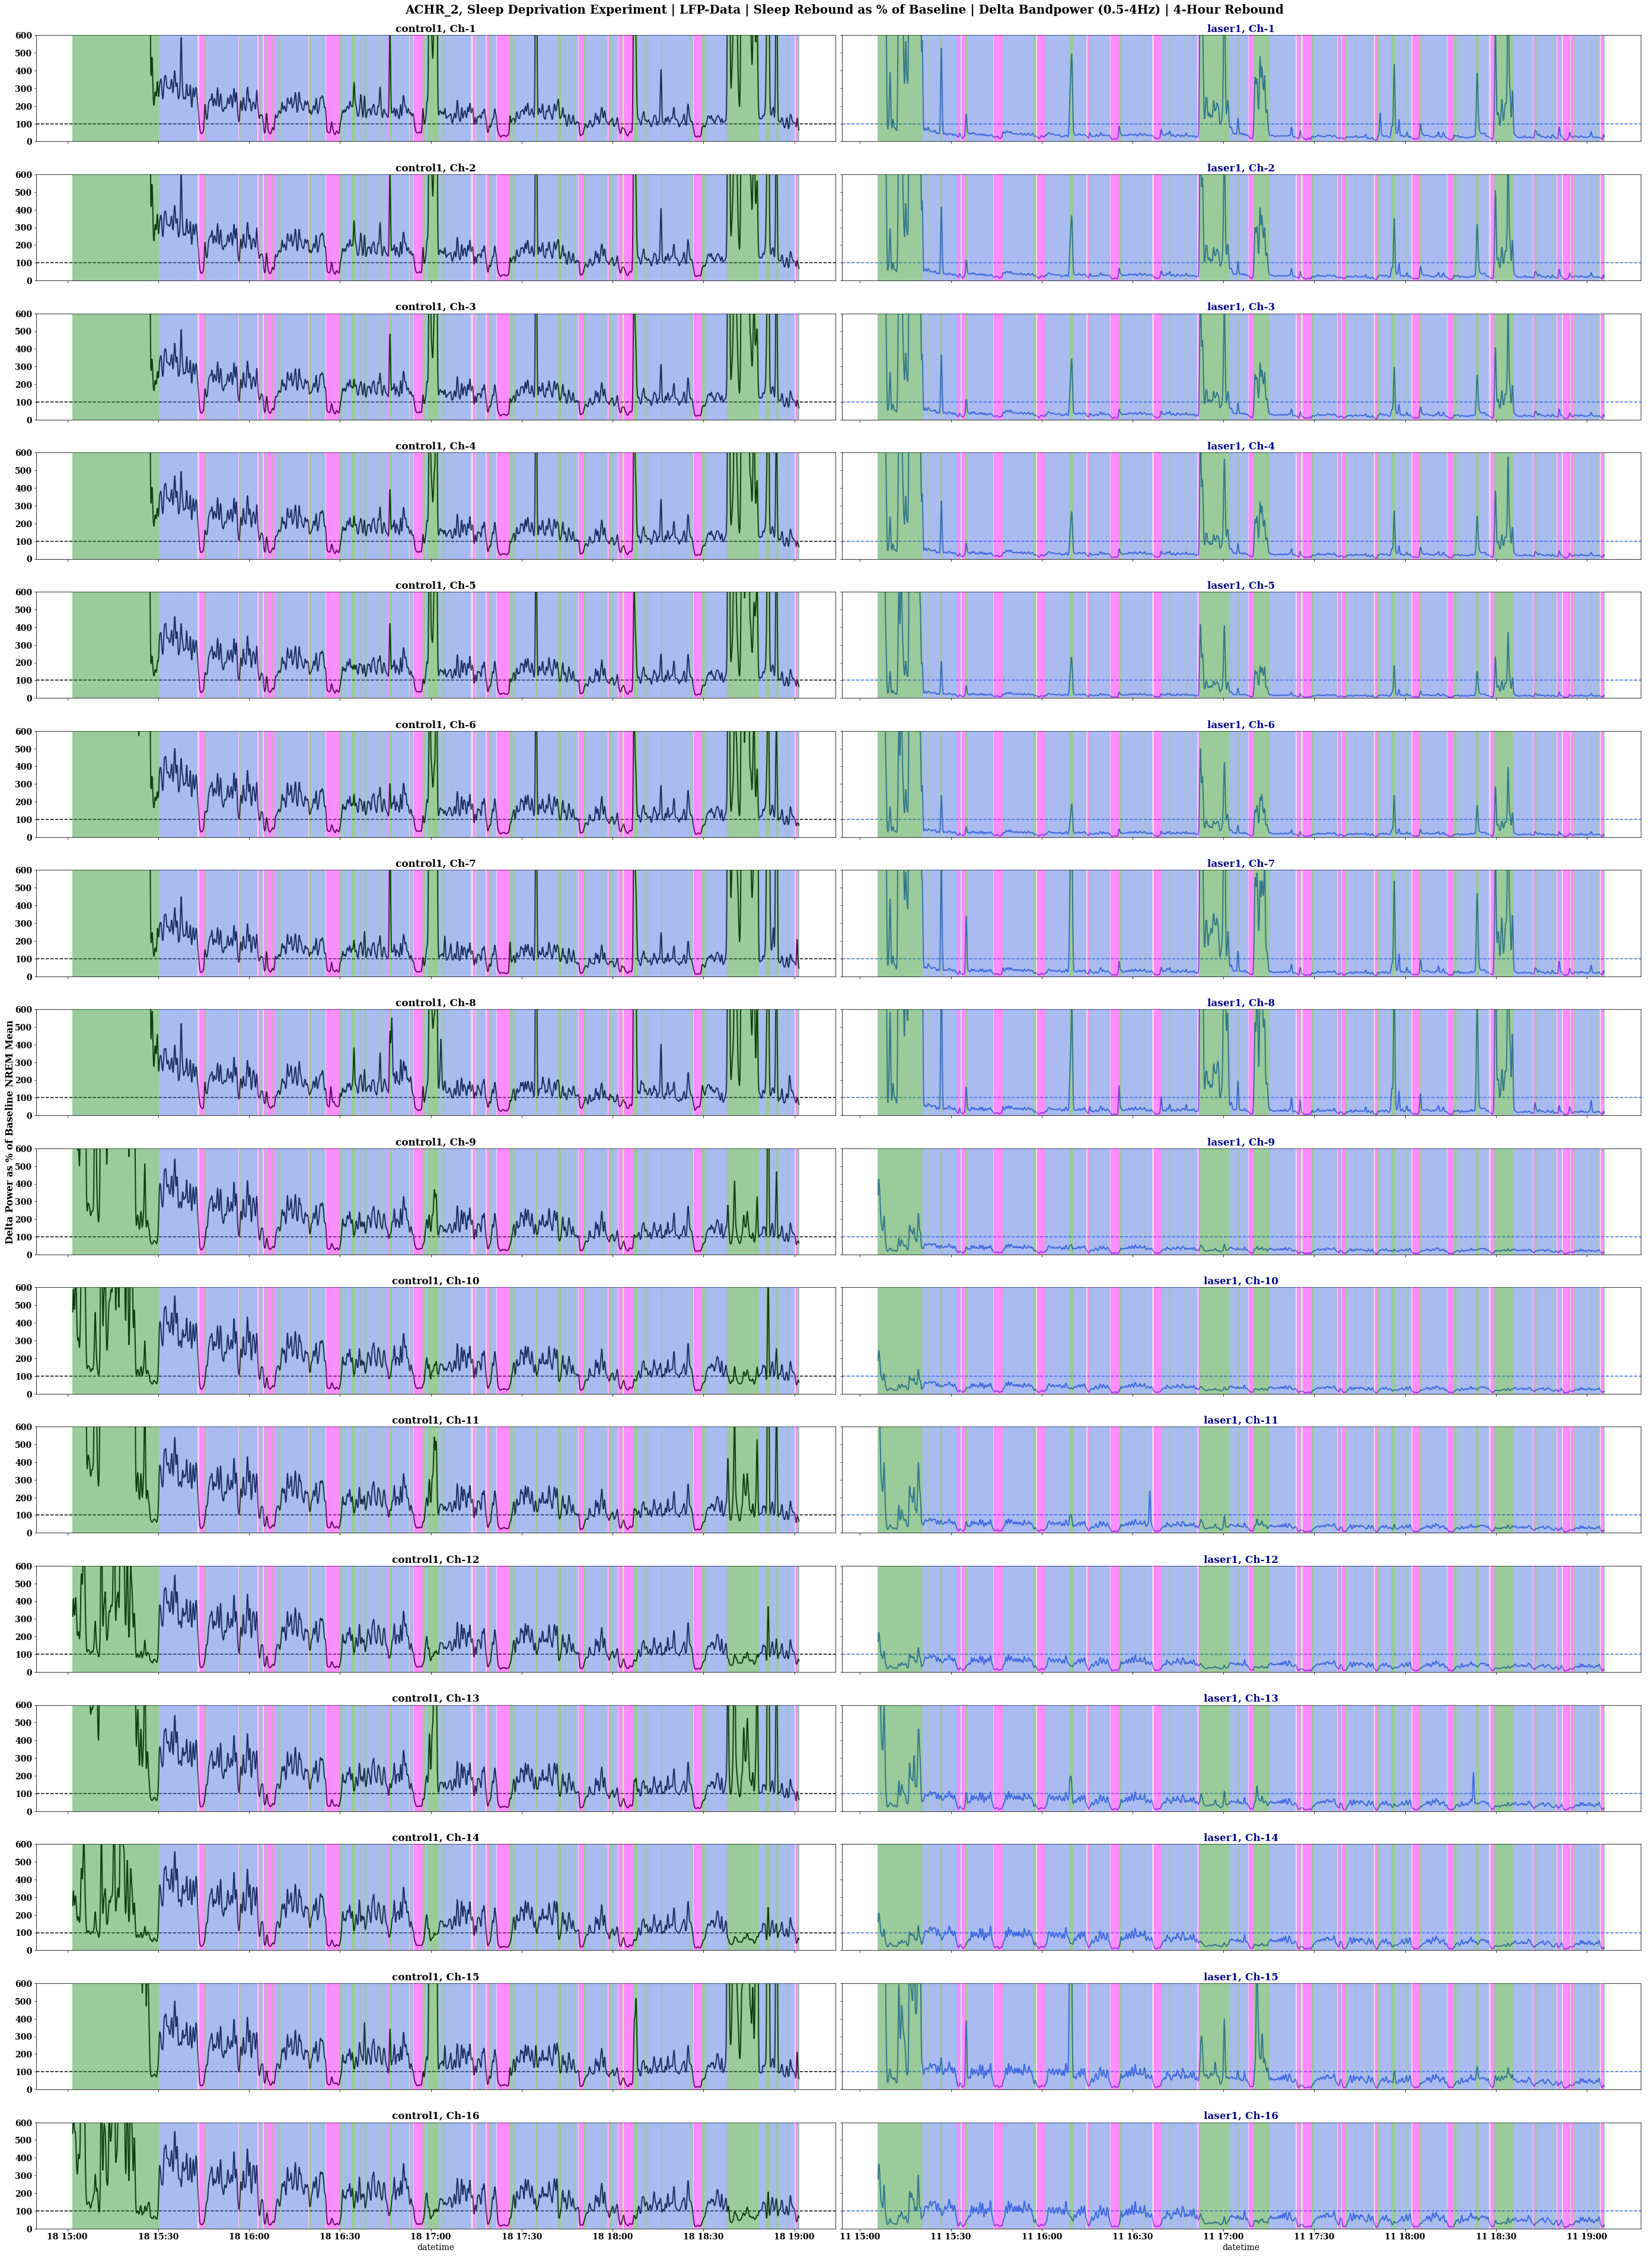

In [63]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.bp_plot_set(x, a2sf, a2h, ylim=600)

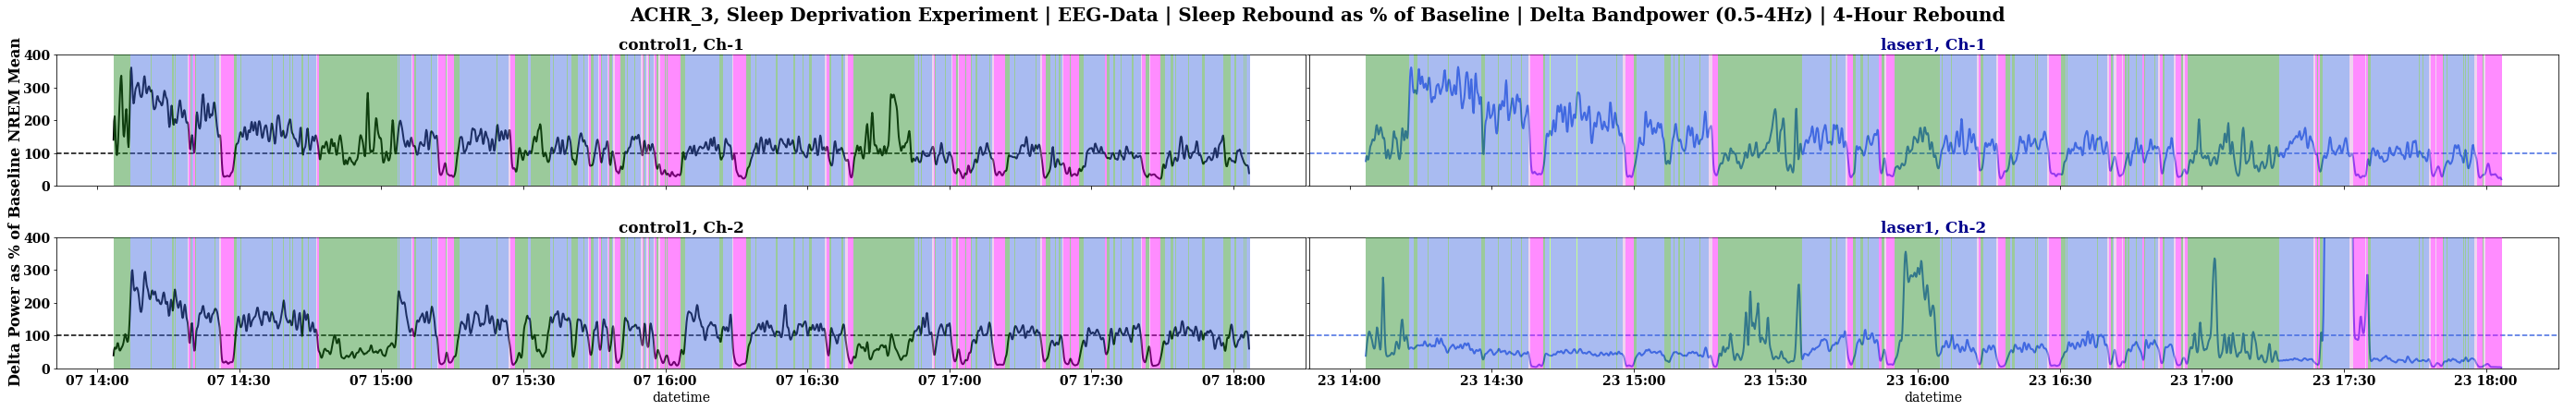

In [61]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.bp_plot_set(x, a3se, a3h, ylim=400)

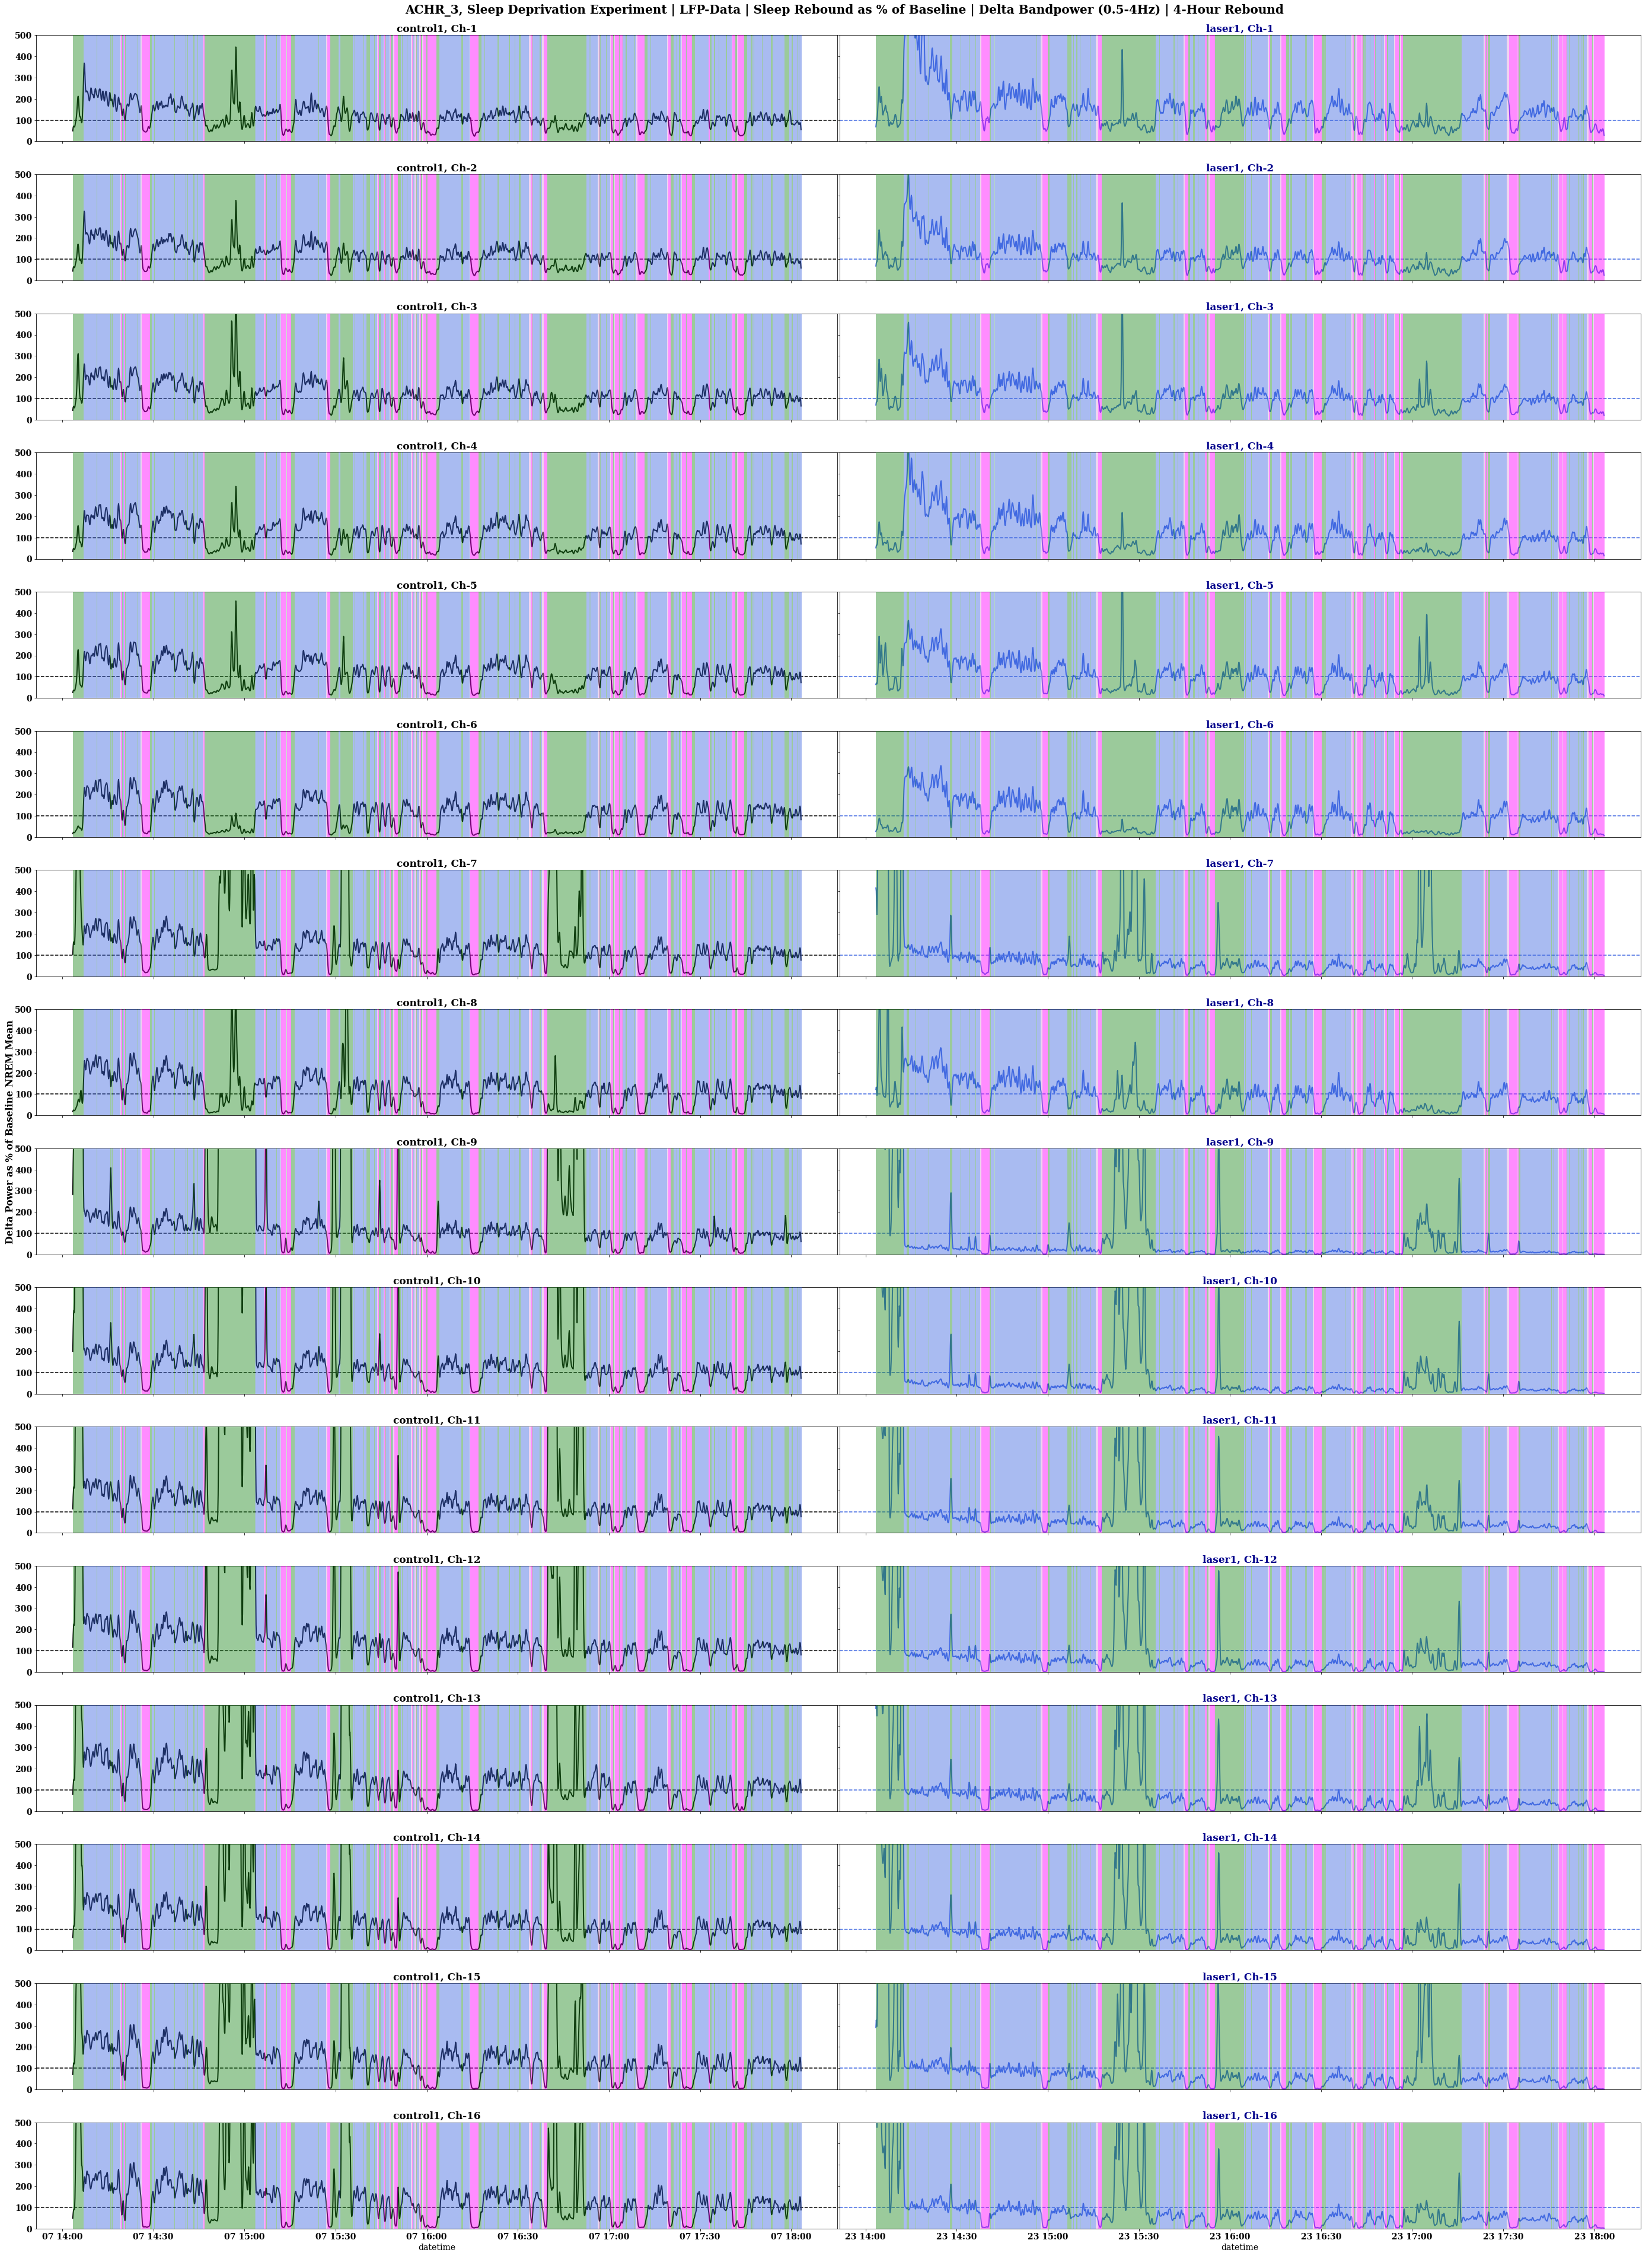

In [62]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.bp_plot_set(x, a3sf, a3h, ylim=500)

# Total PSD Changes across entire 4-Hour Rebound, and Across all Frequency Bands

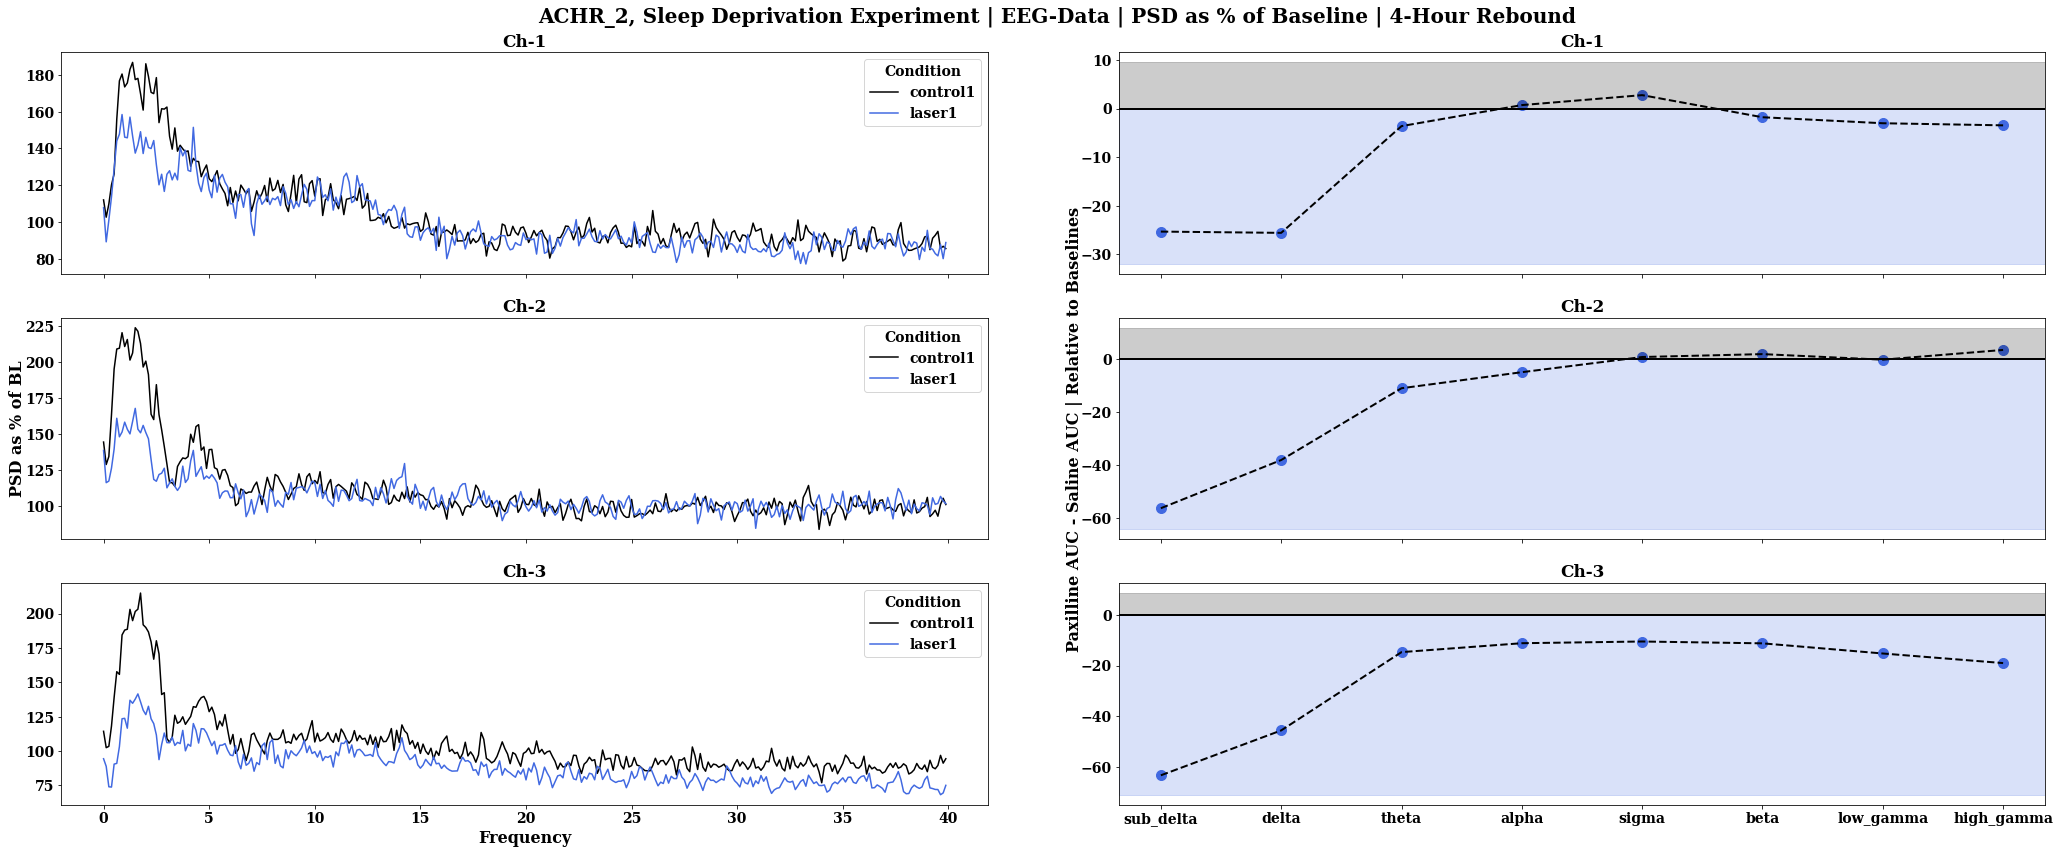

In [65]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.auc_master_plot(x, a2se, a2h)

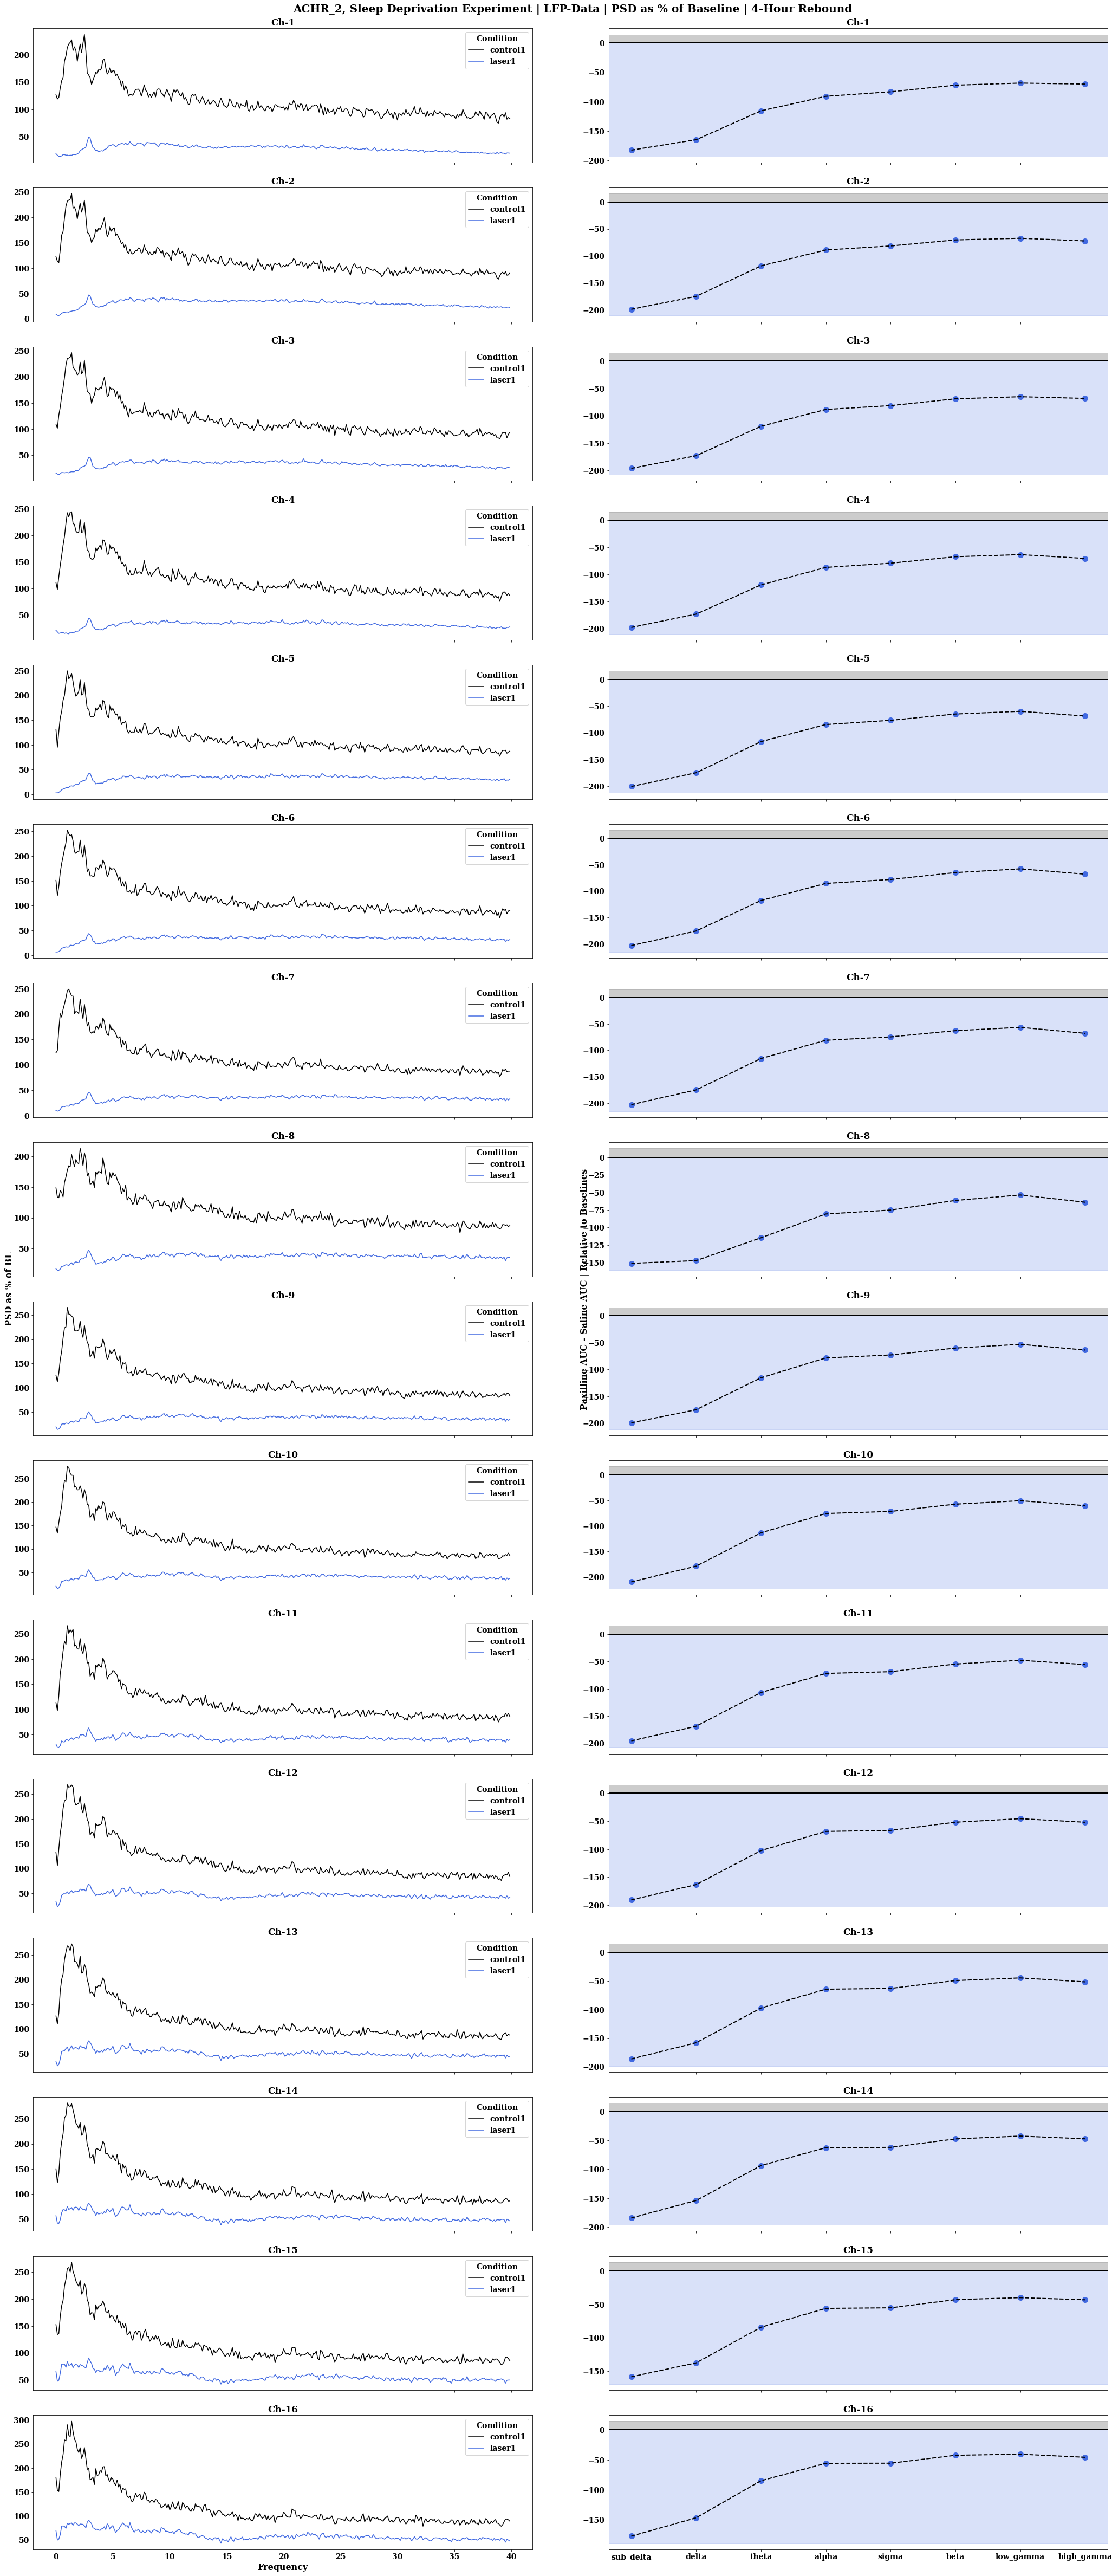

In [67]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.auc_master_plot(x, a2sf, a2h)

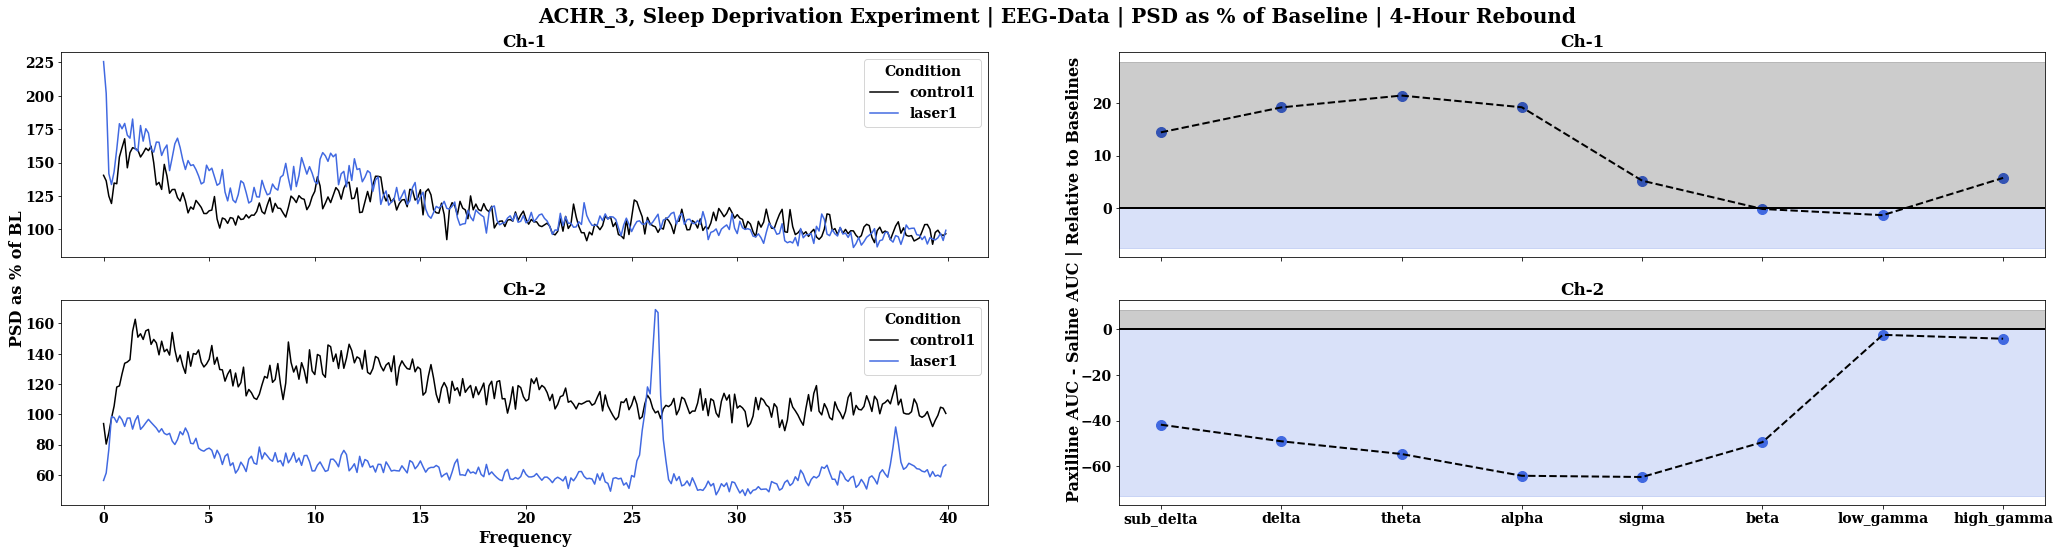

In [66]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.auc_master_plot(x, a3se, a3h)

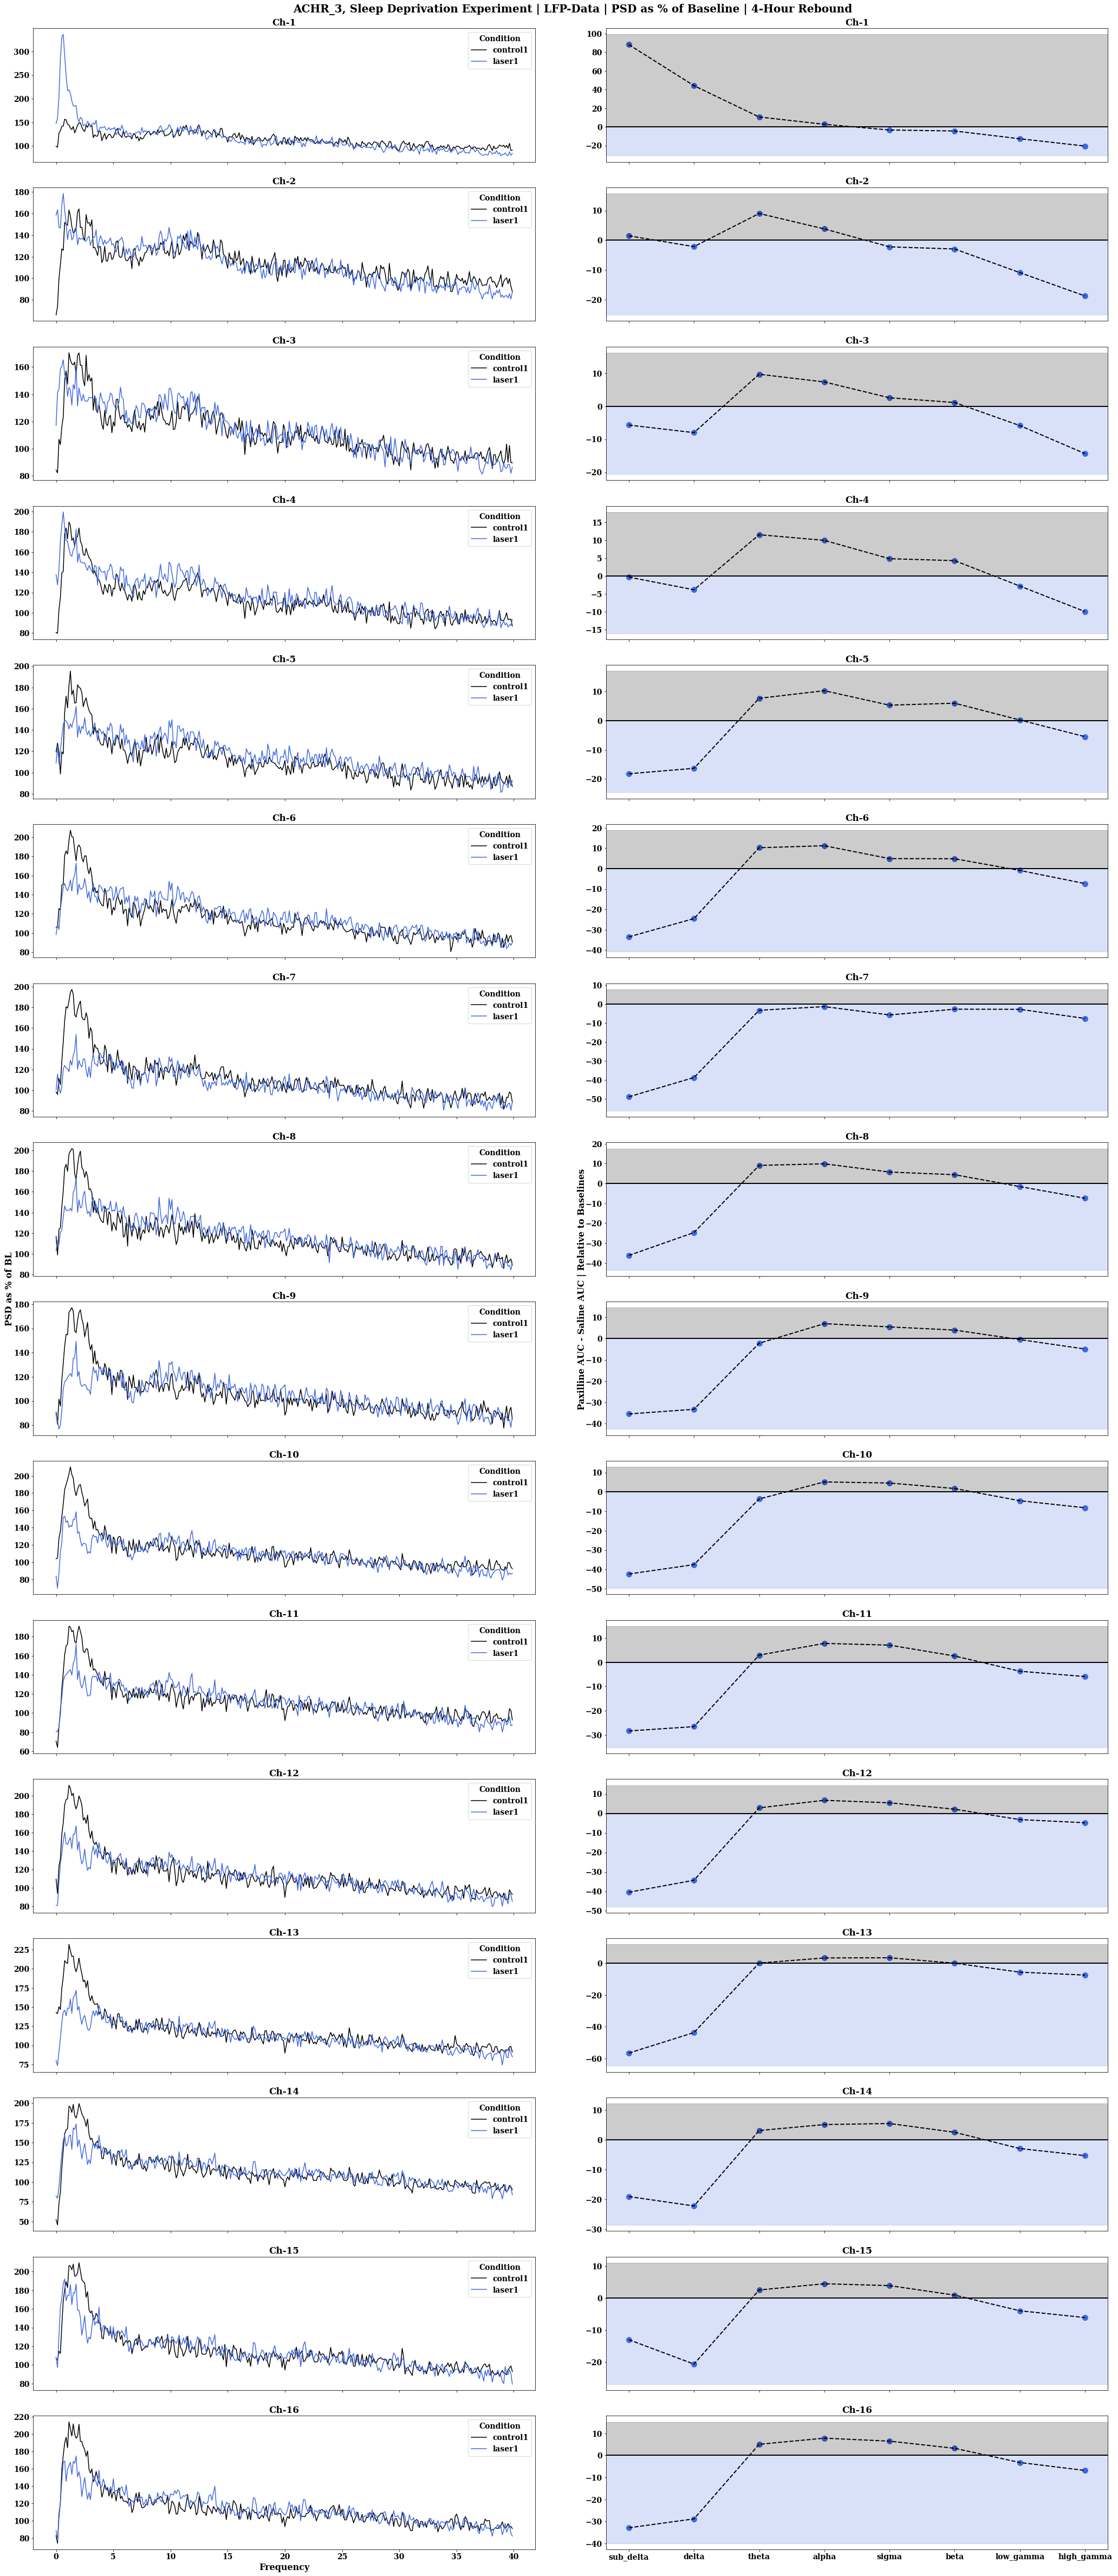

In [68]:
x = ('control1', 'laser1', 'Sleep Deprivation Experiment')
ap.auc_master_plot(x, a3sf, a3h)

# Export

In [69]:
! jupyter nbconvert --output-dir='/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/' --to=html --TemplateExporter.exclude_input=True -TagRemovePreprocessor.remove_cell_tags='hide' --allow-errors ACHR_MASTER.ipynb

[NbConvertApp] Converting notebook ACHR_MASTER.ipynb to html
[NbConvertApp] Writing 9307665 bytes to /Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_MASTER.html
